# Codes from Yi Li, MQE UCLA

# Project 1.) First Cloud Function

### Description : a cloud function that takes in a string of numbers and returns a json file that contains the the sum of all of the single digit numbers

#### Example : input ="12345"
#### output = 1+2+3+4+5 = 15
#### returns({"answer":15})

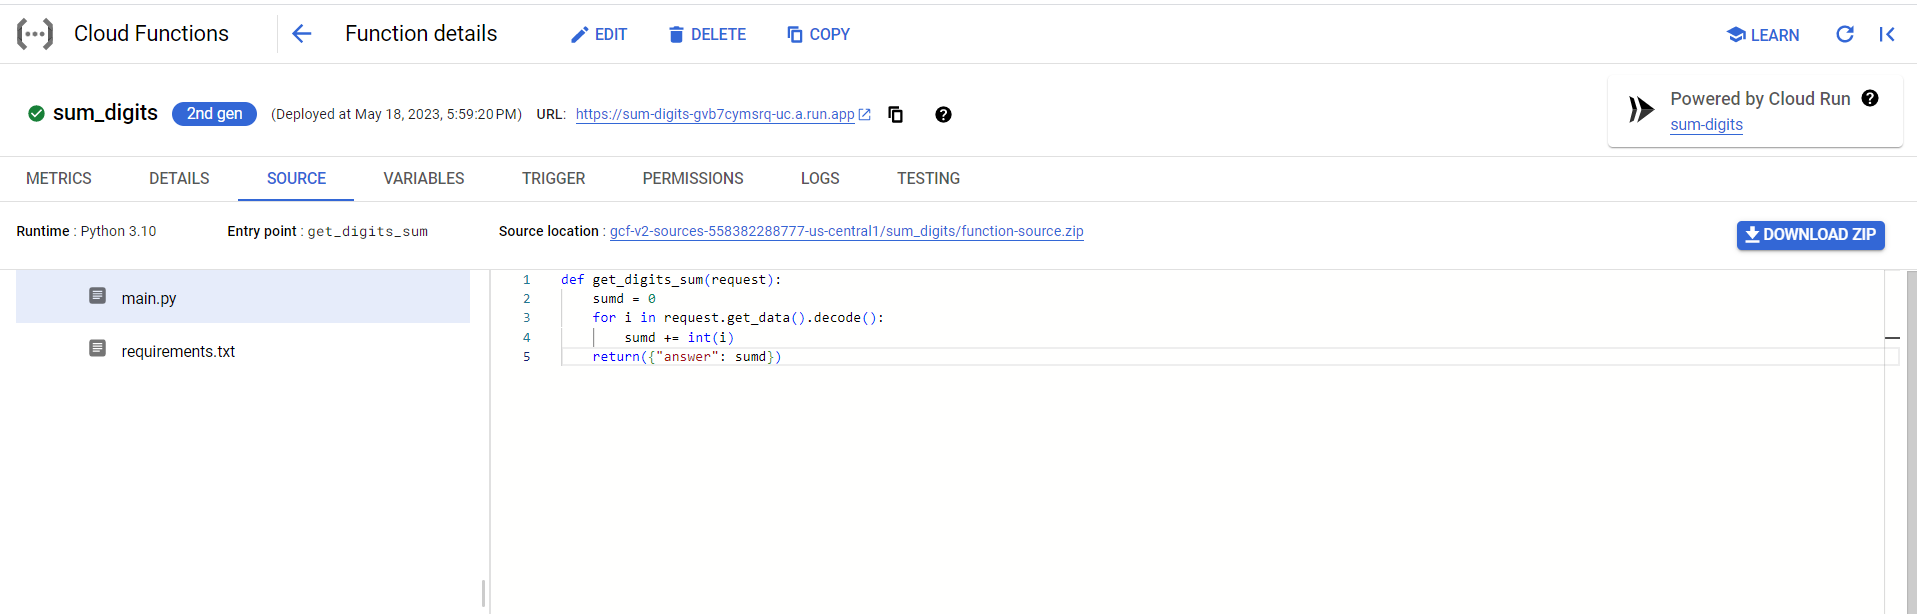

In [3]:
# cloud function
from IPython.display import Image
Image(filename = 'q1.png')

In [4]:
import requests
url = "https://sum-digits-gvb7cymsrq-uc.a.run.app"
response = requests.post(url, "012937")
response.json()

{'answer': 22}

In [5]:
response = requests.post(url, "2")
response.json()

{'answer': 2}

In [6]:
response = requests.post(url, "9999999999999")
response.json()

{'answer': 117}

# Project 2.) Automated Webscraping

### Description : Build a cloud function to programatically scrape a website that is scrapable with Beautiful soup that updates with some frequency.

The World Economic Outlook (WEO) is a report published by the International Monetary Fund (IMF) that provides an assessment of the global economic situation and outlook. It includes analysis and projections of key economic indicators such as economic growth, inflation, trade, and financial markets, as well as commentary on policy challenges and risks to the global economy. The report covers both developed and developing countries, and it often includes special features on specific topics of interest. The WEO is widely regarded as a reliable source of information and analysis on the global economy and is used by policymakers, investors, and researchers around the world to inform their decisions. 

We could use scheduler to scrape the information of the reports automatically every year on January 1st to update the dataset of the reports, including title, published date, description, and link of these reports. Yearly updated information on the dataset of the reports is valuable in the following business settings:

1. Market Research and Analysis: IMF reports provide valuable insights into the global economy, individual country economies, and specific economic indicators. Updated information of reports can help businesses understand the economic conditions, trends, and forecasts for different regions, which can be beneficial for market research and analysis. This information can assist in assessing market potential, identifying growth opportunities, and making informed investment decisions.

2. Financial Planning and Forecasting: IMF reports provide economic projections, including GDP growth rates, inflation rates, fiscal deficits, and exchange rates. Businesses can capture economic outlook through information set of the reports and extract most relevant information they need. So they can leverage this information to enhance their financial planning and forecasting processes. By considering the macroeconomic factors and trends outlined in the reports, companies can make more accurate financial projections, evaluate the potential impact on their operations, and adjust their strategies accordingly.

3. Risk Management and Business Continuity: In an interconnected global economy, businesses can be affected by economic shocks, currency fluctuations, financial crises, or other systemic risks. IMF reports provide analysis and assessments of such risks, helping businesses identify potential vulnerabilities and develop risk management strategies. By staying informed about global economic conditions and potential risks, companies can prepare contingency plans, diversify their operations, and mitigate potential disruptions.

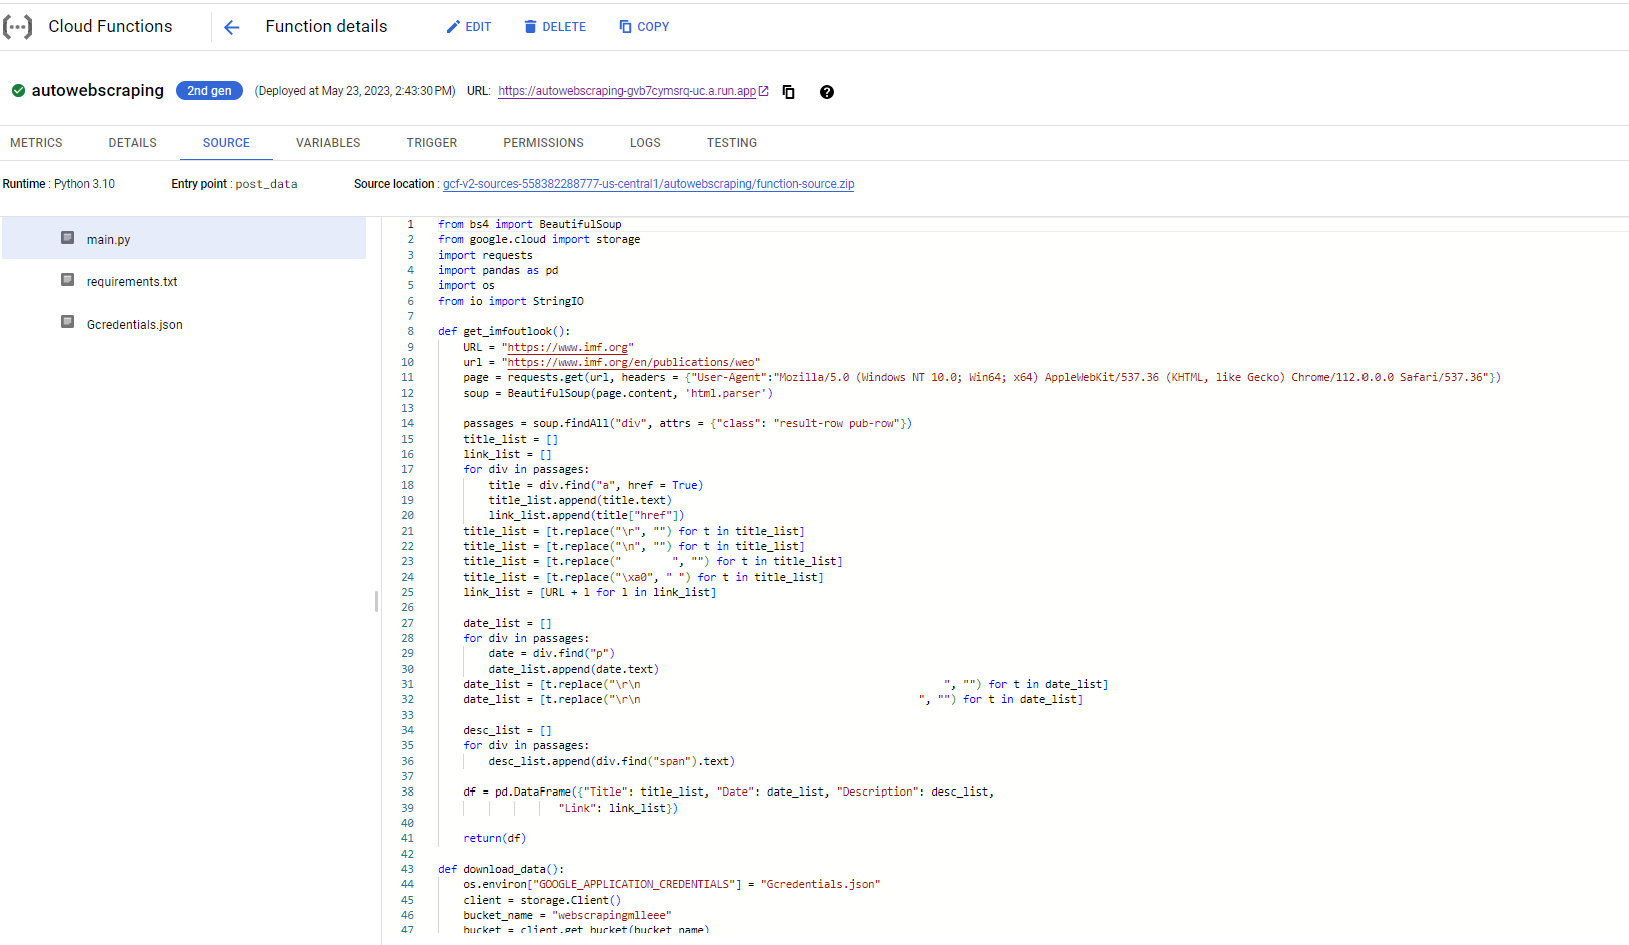

In [7]:
# Website URL: https://www.imf.org
# cloud function
Image(filename = 'q2.1.png')

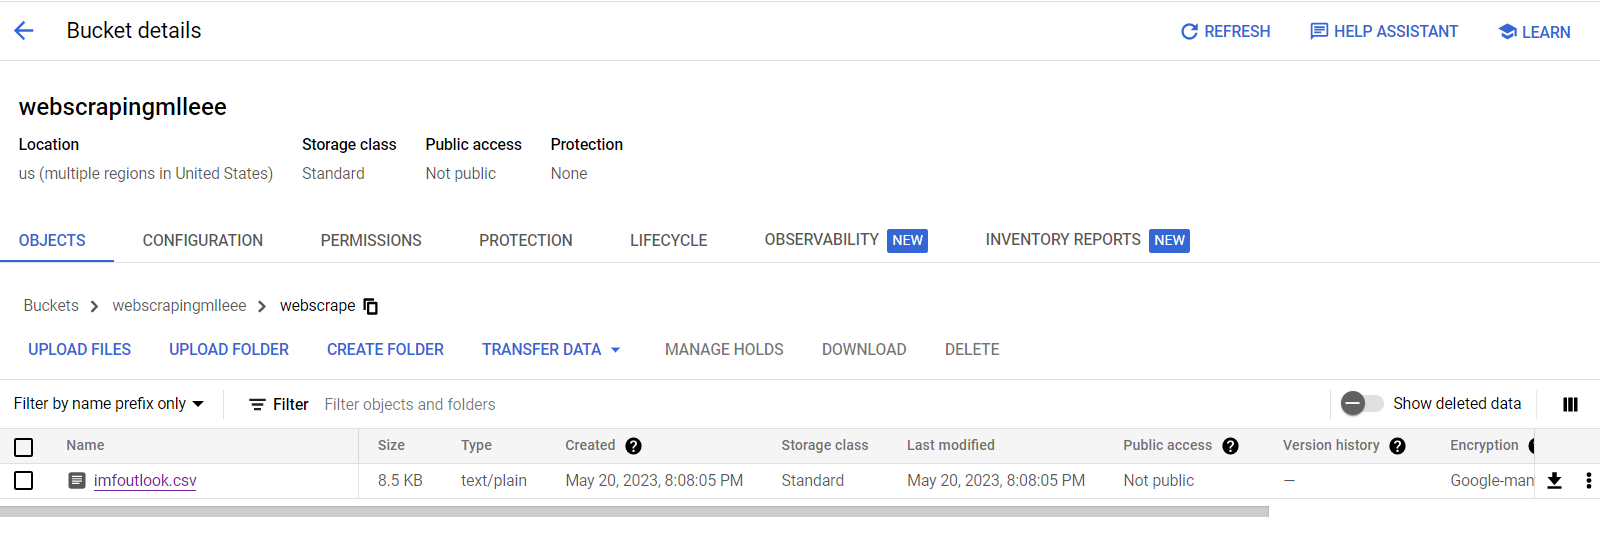

In [8]:
# cloud storage
Image(filename = 'q2.2.png')

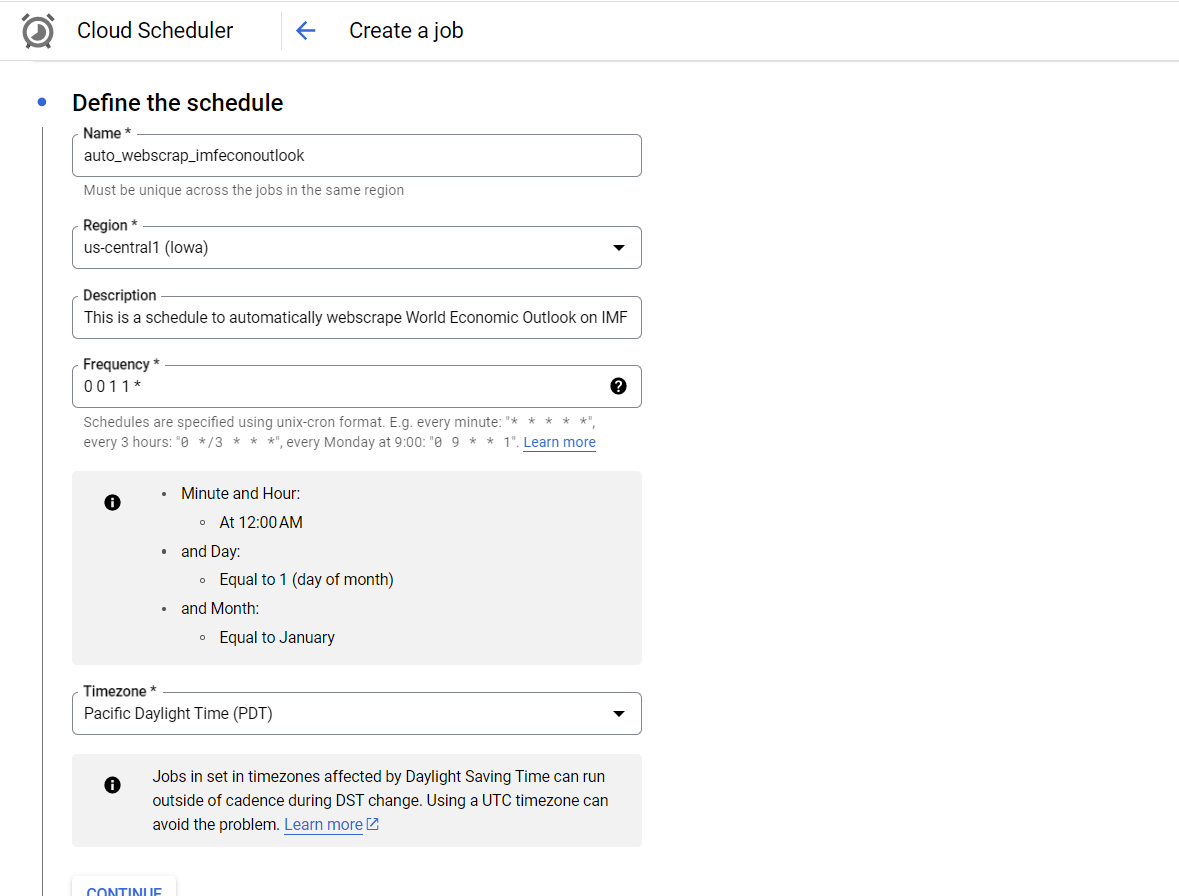

In [9]:
# cloud scheduler - setting 1
Image(filename = 'q2.3.png')

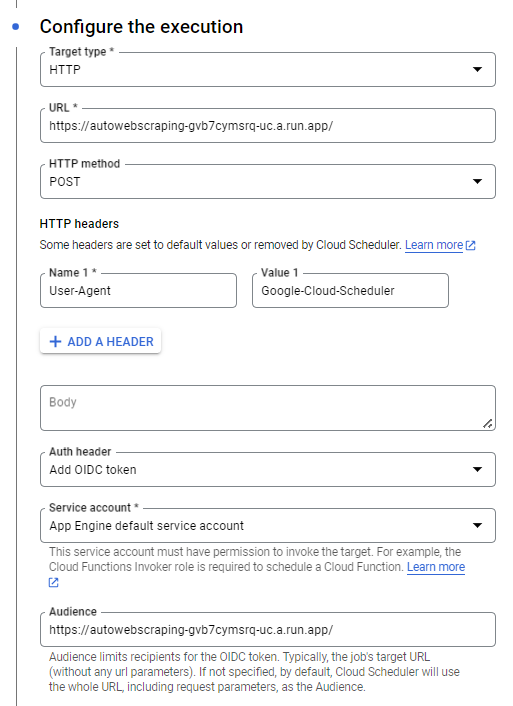

In [10]:
# cloud scheduler - setting 2
Image(filename = 'q2.4.png')

In [11]:
from google.cloud import storage
import os
from io import StringIO
import pandas as pd

os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "Gcredentials.json"
client = storage.Client()
bucket_name = "webscrapingmlleee"
bucket = client.get_bucket(bucket_name)
blob = bucket.blob("webscrape/imfoutlook.csv")
csv_data = blob.download_as_text()
df = pd.read_csv(StringIO(csv_data))
df.head()

,Title,Date,Description,Link
0,"World Economic Outlook, April 2023: A Rocky Re...","April 11, 2023",The baseline forecast is for growth to fall fr...,https://www.imf.org/en/Publications/WEO/Issues...
1,Inflation Peaking amid Low Growth,"January 30, 2023",The January 2023 World Economic Outlook Update...,https://www.imf.org/en/Publications/WEO/Issues...
2,"World Economic Outlook, October 2022: Counteri...","October 11, 2022",Global economic activity is experiencing a bro...,https://www.imf.org/en/Publications/WEO/Issues...
3,"World Economic Outlook Update, July 2022: Gloo...","July 26, 2022",A tentative recovery in 2021 has been followed...,https://www.imf.org/en/Publications/WEO/Issues...
4,"World Economic Outlook, April 2022: War Sets B...","April 19, 2022",The war in Ukraine has triggered a costly huma...,https://www.imf.org/en/Publications/WEO/Issues...


# Project 3.) Machine Learning Cloud Services

### Description : Build some machine learning model using scikit learn and make it queriable using cloud functions

The insurance companies, especially the auto insurance companies would use our ML app. In this machine learning app, we train a Neural Network model with three features: "age", "sex", and "total amount of claims", to see whether the case is a auto insurance fraud with returning the probability of being a fraud. The dataset used to train Neural Network model is the 7-state traffic accident insurance claims in the United States in 2015, which was publicly released by Bunty Shah on Kaggle. The target variable “fraud_reported” is a binary variable, which records two states of the claims and we encode them into 1 for fraud claims and 0 for normal claims. This ML app is valuable for insurance companies' uses for following situations:

1. For Claims Investigators: Claims investigators are responsible for investigating suspicious or potentially fraudulent insurance claims. By utilizing the Neural Network model built in this ML app, they can leverage the predictions to prioritize their investigations. This app can help identify claims that are more likely to be fraudulent, allowing investigators to allocate their resources effectively and focus on cases with a higher risk of fraud.

2. For Fraud Detection and Prevention Team: Companies often have dedicated fraud detection and prevention teams that proactively monitor and combat fraudulent activities. These teams can utilize this ML app as part of their overall fraud detection framework. The app's predictions can serve as an additional input to their existing systems, helping them identify patterns and trends related to the auto insurance fraud.

3. Fo Customer Service Representatives: Customer service representatives who handle insurance claims can benefit from the app's predictions. When processing claims, they can refer to the model's output to better understand the risk associated with a claim. This information can guide them in their interactions with customers, allowing them to ask targeted questions or gather additional evidence when dealing with potentially fraudulent claims.

In [12]:
url = 'https://ml-frauddetection-gvb7cymsrq-uc.a.run.app'
r = requests.post(url, { "age" : 45, "sex" : 1, "total_claim_amount" : 20000})
r.json()

{'prediction': 'Not a Fraud',
 'probability of an insurance fraud': '12.9%',
 'status': 200}

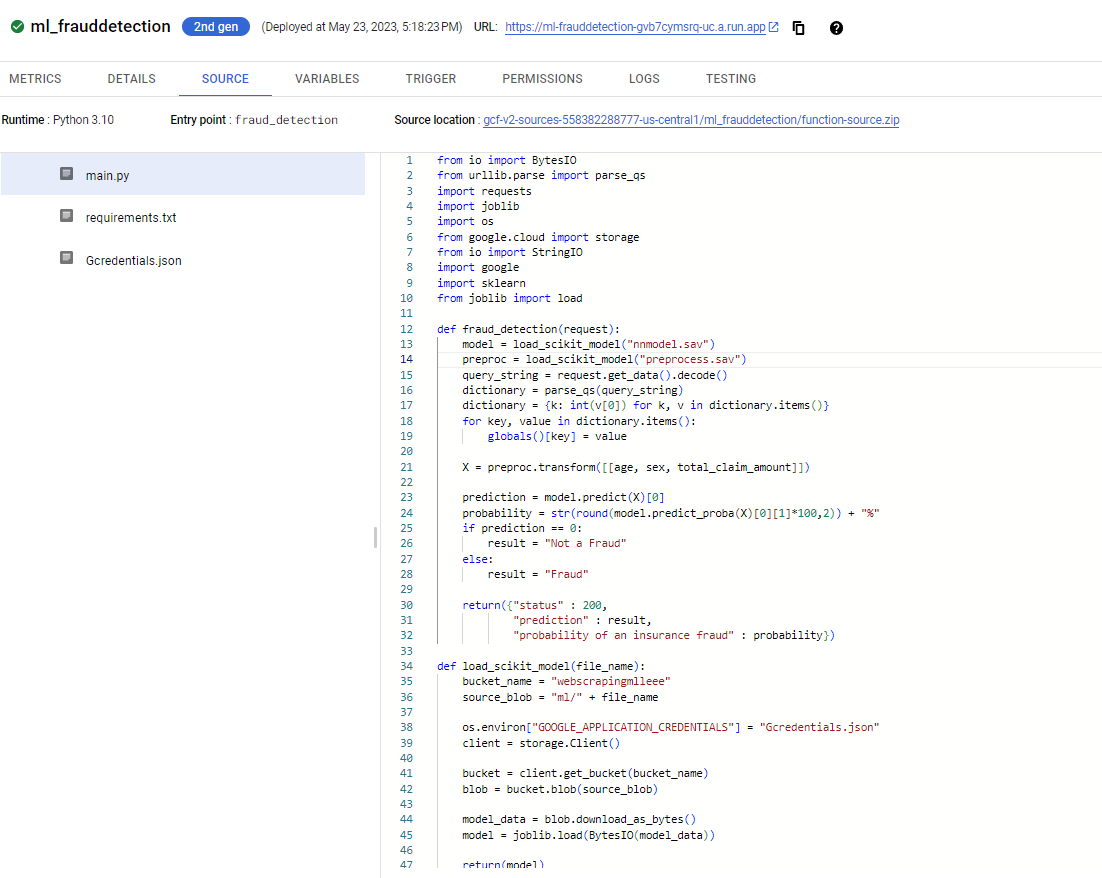

In [14]:
#cloud function
Image(filename = 'q3.png')

## A user-friendly input page

In [2]:
# Click here and press Ctrl+Enter
%run FraudDetection.ipynb

'Welcome to the easy auto insurance fraud detection!'

Text(value='', description='Age', placeholder='Type Your Age')

Text(value='', description='Sex', placeholder='Type Your Sex (1 If Female Or 0 If Male)')

Text(value='', description='Total Amount of Claims', placeholder='Type Your Total Amount of Claims')

Button(description='Click After Inputs are filled', style=ButtonStyle())